## Independent Groups - T intervals

So far, we have considered confidence intervals pertaining to a single distribution. 

This will be handy when we want to estimate the mean of a single population, or when we want to qualify a given estimate as being "unusual" or "typical" for a given population.

But in many cases, we might not be interested only in a single population. We might want to compare two populations, and see if there is a difference between them.

### Framing the problem

If we are interested in comparing two populations, we will want to know if the difference between the two population means is statistically significant. To do this in the framework of confidence intervals, we will want to calculate a confidence interval for the difference between the two population means.

Our rationale is as follows: if the confidence interval for the difference between the two population means does not contain zero, then we can be confident that the difference between the two population means is statistically significant.

### Assumptions

In order to frame this problem in terms of the confidence interval framework, we will need to make some assumptions.

First, we will assume that the two populations are independent of each other. This means that the value of one observation does not affect the value of the other observation.

Second, we will assume that the two populations are normally distributed. This means that the distribution of the sample means will be normally distributed.

### The protocol

To compare two populations, we will use the following protocol:

1. We will take a random sample from each population.
2. We will calculate the mean of each sample.
3. We will calculate the difference between the two sample means.
4. We will calculate a confidence interval for the difference between the two sample means.

### The Problem 

Until now, we have been studying confidence intervals for a single population, and relying on the CLT to tell us that the distribution of our estimators, the sample means, is normal. This allows us to use the T-distribution to calculate confidence intervals for the population mean.

1. But remember that the T-distribution depends on the sample size. If we have two populations, then we will have two sample sizes. Which sample size should we use to calculate the degrees of freedom?

2. The T-distribution also depends on the sample standard deviation. But if we are working with two populations, what is the expected variance of the difference between the two sample means? 


### The Solution

The solution to this problem is to use the T-distribution for the difference between two sample means. This distribution is defined by the following parameters:

1. The degrees of freedom, which is calculated as the sum of the degrees of freedom for each sample.

2. The standard error of the difference between the two sample means, which is calculated as the square root of the sum of the squared standard errors for each sample.


### The T-test for the difference between two sample means - equal variances

Formally, the T confidence interval for the difference between two sample means is cdefined as follows:

$$\bar{X} - \bar{Y} \pm t_{\alpha/2, \nu}  * {S^2_p}\sqrt{\frac{1}{n_X} + \frac{1}{n_Y}}$$


where:

- $\bar{X}$ is the mean of the first sample
- $\bar{Y}$ is the mean of the second sample
- $n_X$ is the size of the first sample
- $n_Y$ is the size of the second sample
- $\nu$ is the degrees of freedom, which, **for equal variances**, is calculated as $n_1 + n_2 - {S^2_p} is the pooled variance, which is calculated as follows:

$$S^2_p = \frac{(n_X - 1)S^2_X + (n_Y - 1)S^2_Y}{n_X + n_Y - 2}$$

- $S^2_X$ is the variance of the first sample
- $S^2_Y$ is the variance of the second sample

Notice that as the sample sizes increase, the degrees of freedom increase, the last factor in the equation decreases, and the confidence interval becomes narrower.


### Example

Let's say we are looking at student test scores for two different schools. We want to know if there is a difference between the two schools. 

The code below generates two samples of test scores, one for each school. It explicitly makes the test scores for the second school lower than the test scores for the first school. 


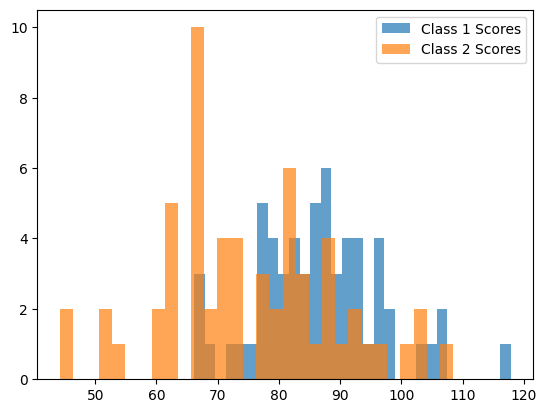

In [1]:
# simulate stendent test scores for two classes, where one class did better than the other. 
# plot the scores and compare the distributions

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# set the random seed
np.random.seed(123456789)

# generate the data
class_size = 60
class1_mean = 85
class1_std = 10
class2_mean = 75
class2_std = 15

# generate the data
class1_scores = np.random.normal(class1_mean, class1_std, class_size)
class2_scores = np.random.normal(class2_mean, class2_std, class_size)

# plot the data
plt.figure()
plt.hist(class1_scores, alpha=0.7, label='Class 1 Scores', bins= 30)
plt.hist(class2_scores, alpha=0.7, label='Class 2 Scores', bins= 30)
plt.legend()
plt.show()


In [3]:
# calculate the t-statistic step-by-step

# alpha level
alpha = 0.05
# calculate the difference in means
mean_class1 = np.mean(class1_scores)
mean_class2 = np.mean(class2_scores)
mean_diff = mean_class1 - mean_class2

# calculate the standard error of the difference in means
std_class1 = np.std(class1_scores)
std_class2 = np.std(class2_scores)

# calculate the degrees of freedom
n1 = len(class1_scores)
n2 = len(class2_scores)
df = n1 + n2 - 2

# calculate pooled variance
n1 = len(class1_scores)
n2 = len(class2_scores)
pooled_var = ((n1-1)*std_class1**2 + (n2-1)*std_class2**2)/(n1+n2-2)

# calculate interval bounds
t_crit = stats.t.ppf(1-alpha/2, df=df)
margin_of_error = t_crit * np.sqrt(pooled_var * (1/n1 + 1/n2))
ci_lower = mean_diff - margin_of_error
ci_upper = mean_diff + margin_of_error

# calculate the t-statistic
t_stat = mean_diff / np.sqrt(pooled_var * (1/n1 + 1/n2))

print(f"Mean Difference: {mean_diff:0.2f}")
print(f"Confidence Interval: [{ci_lower:0.2f}, {ci_upper:0.2f}]")

Mean Difference: 11.37
Confidence Interval: [6.94, 15.81]




### The T-test for the difference between two sample means - unequal variances

If the variances of the two populations are not equal, then the degrees of freedom is calculated as follows:

$$\nu = \frac{\left(\frac{s^2_X}{n_X} + \frac{s^2_Y}{n_Y}\right)^2}{\frac{\left(\frac{s^2_X}{n_X}\right)^2}{n_X - 1} + \frac{\left(\frac{s^2_Y}{n_Y}\right)^2}{n_Y - 1}}$$


**Note** No one remembers this formula. In the next class we will see how to skip these calculations and go straight to the answer.


### The T-test for the difference between two sample means - paired samples

In some cases, we might want to compare two samples that are not independent of each other. For example, we might want to compare the test scores of students before and after a training program. In this case, the two samples are not independent of each other, because the same students are in both samples.


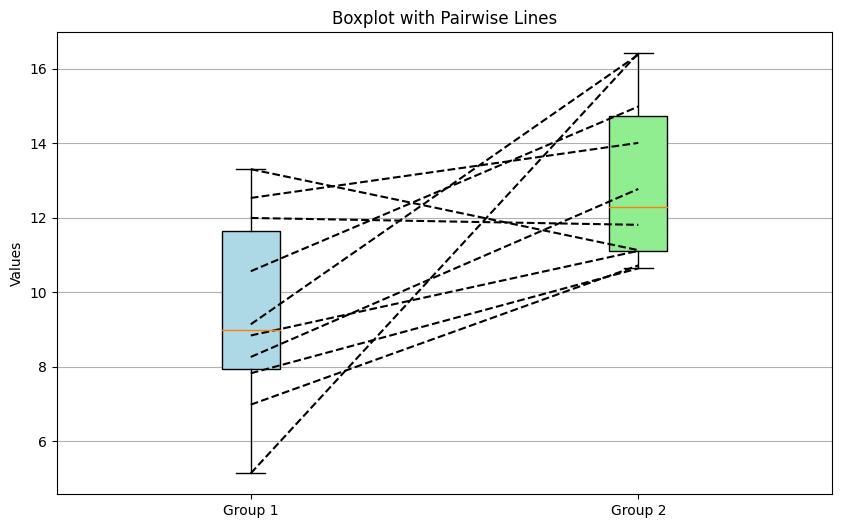

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Generate paired data
np.random.seed(123)
y1 = np.random.normal(10, 2, 10)
y2 = np.random.normal(12, 2, 10)

# Combine the data into a list
data = [y1, y2]

# Create the boxplot
fig, ax = plt.subplots(figsize=(10, 6))
boxplot = ax.boxplot(data, patch_artist=True, notch=False)

# Set colors for the boxes
colors = ['lightblue', 'lightgreen']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Add lines between every pair of observations
for i in range(len(y1)):
    ax.plot([1, 2], [y1[i], y2[i]], 'k--')

# gridlines
ax.yaxis.grid(True)

# Set x-axis labels
ax.set_xticklabels(['Group 1', 'Group 2'])

# Set y-axis label
ax.set_ylabel('Values')

# Add a title
ax.set_title('Boxplot with Pairwise Lines')

# Show the plot
plt.show()


In this case, we can use the T-test for the difference between two sample means - paired samples. This test is defined as follows:

$$\bar{X} - \bar{Y} \pm t_{\alpha/2, \nu}  * {S^2_D}\sqrt{\frac{1}{n}}$$

where:

- $\bar{X}$ is the mean of the first sample
- $\bar{Y}$ is the mean of the second sample
- $n$ is the size of the first sample
- $\nu$ is the degrees of freedom, which, **for paired samples**, is calculated as $n - 1$
- $S^2_D$ is the variance of the difference between the two samples, which is calculated as follows:

$$S^2_D = \frac{\sum_{i=1}^n (X_i - Y_i)^2}{n - 1}$$



